# Introduction

This documents tests and uses cellsym module to conduct and visualize *spherical cow approximation* simulations of symmetric cell behavior.

The modle just tracks position of each electrode on an experimental V-Q characteristic, which is terated as the equation of state (eos) of the electrode material. No attempt is used to account for kinetic effects, other than the posibility to introduce ad-hov overpotentials.

## Setup

Code to load necesary python modules



In [1]:
%matplotlib qt5
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import base64
from matplotlib import animation, rc
from IPython.display import HTML
import cellsym as cs
import matplotlib.ticker as ticker

In [2]:
def show_anim(fname):
    '''Shows animation from file on notebook'''
    #myAnimation.save(fname)
    video = io.open(fname, 'r+b').read()
    encoded = base64.b64encode(video)
    return(HTML(data='''<video alt="test" controls>
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii'))))

# Ideal cell

An ideal cell does not have parasitic currents or active material loss. It ccyles forever without capacity fade. In the absence of overvoltage, the V-Q is not hysteretic.

We start the cell at zero OCV, with both electrodes charged to 4.0 V v. Li.

In [3]:
dtf='/Users/MIMAT_JB/Documents/EES/Daniel/532 symetric cells/PAper 1 echem/For Javier_2018Oct.xlsx'
eos = pd.read_excel(dtf, 0)
cat = cs.Electrode()
cat.interp_VQ(eos)

()

In [ ]:

cell = cs.SymCell(cat)
scv = cs.DB_ticker(cell)
scv.plot(fname='init_state.png', show=True)

In [ ]:
1-cell.cycles.iloc[0]['qA']

## Charge to 0.5 V

In [ ]:
cell = cs.SymCell(cat)
cell.charge2V(0.5)
#scv = cs.DB_ticker(cell)
fname='ideal_charge_01.mp4'
#scv.save_anim(fname=fname, show=True)
#show_anim(fname)

## Discharge to 0V

In [ ]:
cell = cs.SymCell(cat)
cell.charge2V(0.5)
cell.charge2V(0.)
cell.cycles[cell.cycles['cyc_num']==2].index[0]


In [ ]:
scv = cs.DB_ticker(cell)#, cyc_range=[2])
fname='ideal_CD.mp4'
#scv.plot(33, show=False)
scv.save_anim(fname=fname, show=True)
show_anim(fname)

In [ ]:
cell = cs.SymCell(cat)
for i in range(5):
    cell.charge2V(0.5)
    cell.charge2V(0.)
scv = cs.DB_ticker(cell)
fname='ideal_5CD_cyc.mp4'
scv.save_anim(fname=fname, show=True)
show_anim(fname)

In [20]:
def cycle_ends(cycles):
    '''Gathers info at cycle end for plotting v cycle number'''
    cyc_0 = min(cycles['cyc_num'])
    cyc_f = max(cycles['cyc_num'])
    cyc_rg = list(range(cyc_0, cyc_f+1))
    #print(cyc_rg)
    ret=[cycles[cycles['cyc_num']== cyc_rg.pop(0)].iloc[-1]]
    #print(type(ret))
    for i in cyc_rg:
        #print(i)
        cyc = cycles[cycles['cyc_num']== i].iloc[-1]
        #print(cyc)
        ret.append(cyc)
        #print(ret)
    return(pd.DataFrame(ret))

In [ ]:
cell = cs.SymCell(cat)
for i in range(5):
    cell.charge2V(0.5)
    cell.charge2V(0.)
ce=cycle_ends(cell.cycles)

In [ ]:
#%matplotlib inline
ce['Q_D']=ce['Q_cycle'].abs()
ce['Q_C']=ce['Q_cycle'].abs()
ax=ce[ce['cyc_type']=='C'].plot(x='cyc_num', y='Q_C', style = 'o')
ax=ce[ce['cyc_type']=='D'].plot(x='cyc_num', y='Q_D', ax=ax, style = 'o')

# Active material loss
## Cathode loss at top of charge

In [ ]:
cell = cs.SymCell(cat)
for i in range(1):
    cell.charge2V(0.5)
    cell.looseAM(Closs=0.65, absolute = True, num_steps=12)
    cell.charge2V(0.)
    cell.charge2V(0.5)
scv = cs.DB_ticker(cell)
fname='CLTC_1cycc.mp4'
scv.save_anim(fname=fname, show=True)
show_anim(fname)


In [4]:
cell = cs.SymCell(cat)
for i in range(10):
    #print(i, 'C')
    cell.charge2V(0.5)
    #print(i, 'looseAM')
    cell.looseAM(Closs=0.05, absolute = True, num_steps = 12)
    #print(i, 'D')
    cell.charge2V(0.)

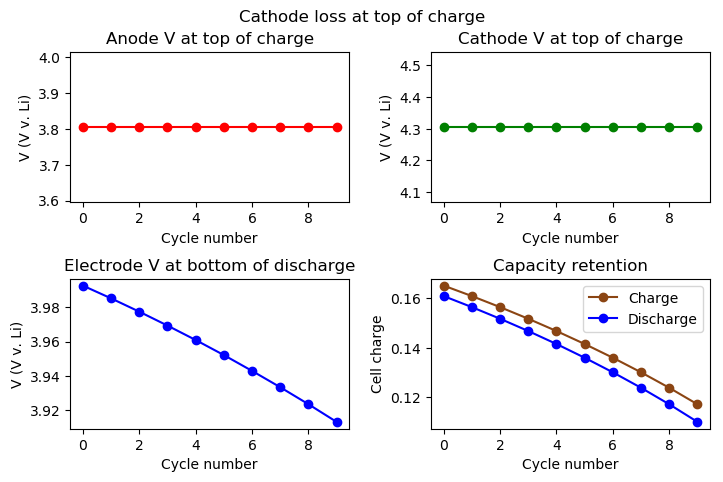

In [5]:
sp=cs.static_plot(cell)
sp.plot(title='Cathode loss at top of charge', fname='CLTC_10.png')


In [ ]:

scv = cs.DB_ticker(cell)
fname='looseC_10CD_cyc.mp4'
scv.save_anim(fname=fname, show=False)
show_anim(fname)

## Cathode loss at bottom of charge

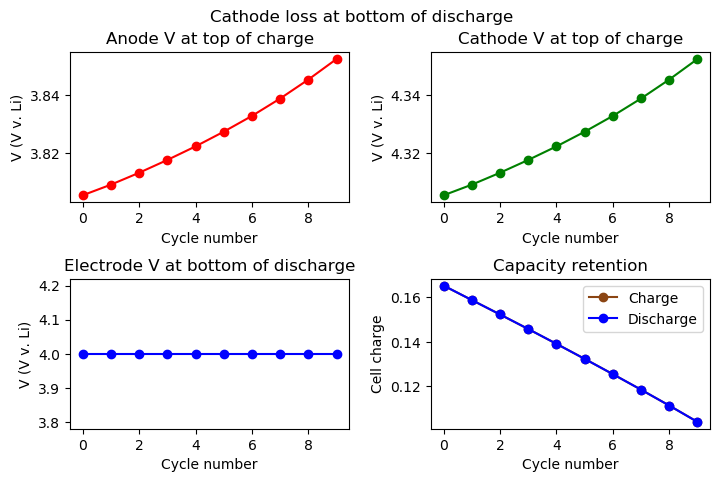

In [10]:
cell = cs.SymCell(cat)
for i in range(10):
    #print(i, 'C')
    cell.charge2V(0.5)
    #print(i, 'looseAM')
    #print(i, 'D')
    cell.charge2V(0.)
    cell.looseAM(Closs=0.05, absolute = True, num_steps = 12)

sp=cs.static_plot(cell)
sp.plot(title='Cathode loss at bottom of discharge', fname='CLBC_10.png')




![Figure](CLBC_10.png "Cathode loss at bottom of charge")



## Anode loss at top of charge

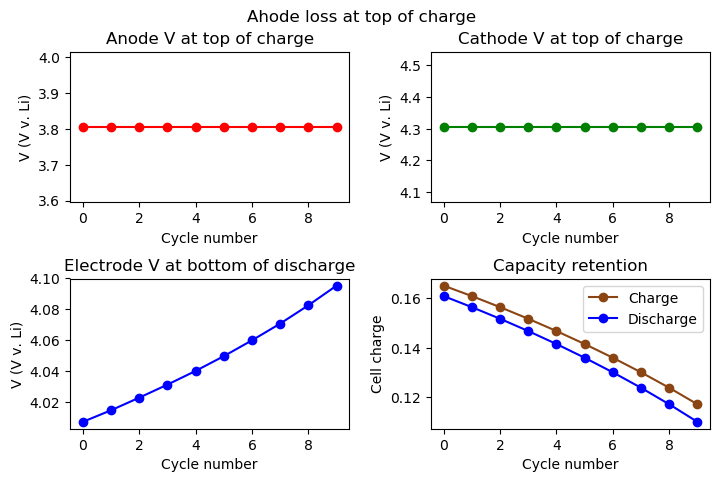

In [9]:
cell = cs.SymCell(cat)
for i in range(10):
    #print(i, 'C')
    cell.charge2V(0.5)
    #print(i, 'looseAM')
    #print(i, 'D')
    cell.looseAM(Aloss=0.05, absolute = True, num_steps = 12)
    cell.charge2V(0.)
    
sp=cs.static_plot(cell)
sp.plot(title='Ahode loss at top of charge', fname='ALTC_10.png')



## Anode loss at bottom of charge

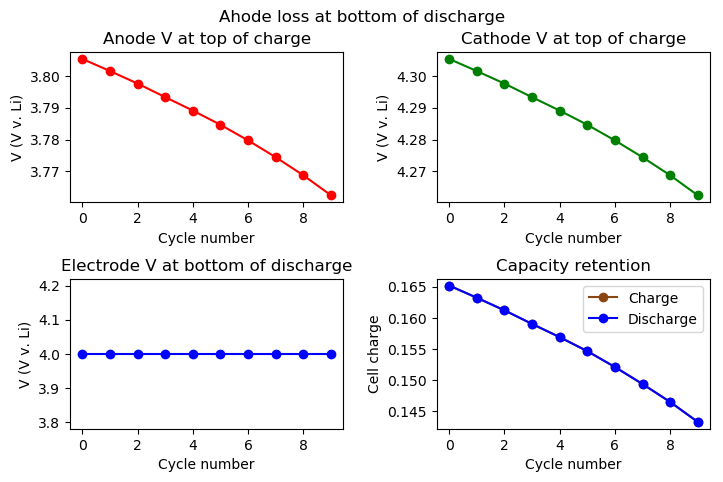

In [11]:
cell = cs.SymCell(cat)
for i in range(10):
    #print(i, 'C')
    cell.charge2V(0.5)
    #print(i, 'looseAM')
    #print(i, 'D')
    cell.charge2V(0.)
    cell.looseAM(Aloss=0.05, absolute = True, num_steps = 12)

sp=cs.static_plot(cell)
sp.plot(title='Ahode loss at bottom of discharge', fname='ALBC_10.png')



## AML comparisson

### Prepare cells

In [15]:
aml_cells={'CLTC': cs.SymCell(cat),'ALTC': cs.SymCell(cat),
          'CLBD': cs.SymCell(cat),'ALBD': cs.SymCell(cat)}
for i in range(10):
    for key,cell in aml_cells.items():
        cell.charge2V(0.5)
    aml_cells['CLTC'].looseAM(Closs=0.05, absolute = True, num_steps = 12)
    aml_cells['ALTC'].looseAM(Aloss=0.05, absolute = True, num_steps = 12)
    for key,cell in aml_cells.items():
        cell.charge2V(0.)
    aml_cells['CLBD'].looseAM(Closs=0.05, absolute = True, num_steps = 12)
    aml_cells['ALBD'].looseAM(Aloss=0.05, absolute = True, num_steps = 12)

### Compare V creep

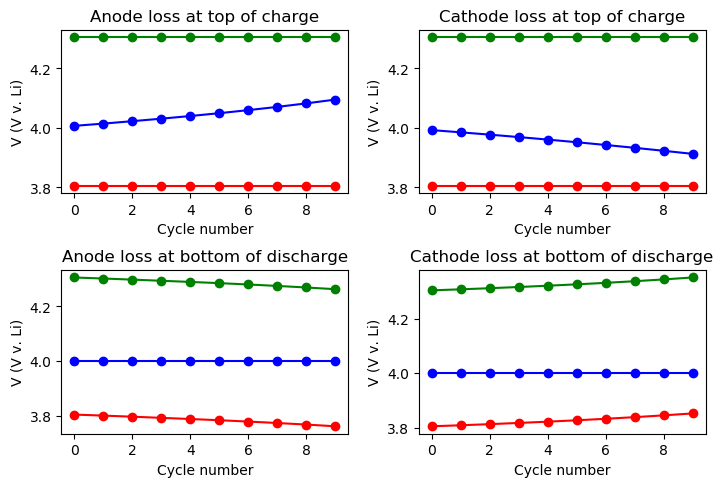

In [35]:
dummy = cs.static_plot(aml_cells['CLTC'])
for axx in dummy.ax:
    for ax in axx:
        ax.clear()
        ax.set_xlabel('Cycle number')
        ax.set_ylabel('V (V v. Li)')
dummy.ax[0][1].set_title('Cathode loss at top of charge')
dummy.ax[1][0].set_title('Anode loss at bottom of discharge')
dummy.ax[1][1].set_title('Cathode loss at bottom of discharge')

y=cycle_ends(aml_cells['ALTC'].cycles)[['VA','VC','V', 'cyc_type']]
yy=y[y['cyc_type']=='C']['VA']
x=np.arange(len(yy))
dummy._plot_V_num(x, yy, dummy.ax[0][0],
                  title='Anode loss at top of charge', style ='r-o')
yy=y[y['cyc_type']=='C']['VC']
x=np.arange(len(yy))
dummy._plot_V_num(x, yy, dummy.ax[0][0],
                  title='Anode loss at top of charge', style ='g-o')
yy=y[y['cyc_type']=='D']['VC']
x=np.arange(len(yy))
dummy._plot_V_num(x, yy, dummy.ax[0][0],
                  title='Anode loss at top of charge', style ='b-o')

y=cycle_ends(aml_cells['CLTC'].cycles)[['VA','VC','V', 'cyc_type']]
yy=y[y['cyc_type']=='C']['VA']
x=np.arange(len(yy))
dummy._plot_V_num(x, yy, dummy.ax[0][1],
                  title='Cathode loss at top of charge', style ='r-o')
yy=y[y['cyc_type']=='C']['VC']
x=np.arange(len(yy))
dummy._plot_V_num(x, yy, dummy.ax[0][1],
                  title='Cathode loss at top of charge', style ='g-o')
yy=y[y['cyc_type']=='D']['VC']
x=np.arange(len(yy))
dummy._plot_V_num(x, yy, dummy.ax[0][1],
                  title='Cathode loss at top of charge', style ='b-o')

y=cycle_ends(aml_cells['ALBD'].cycles)[['VA','VC','V', 'cyc_type']]
yy=y[y['cyc_type']=='C']['VA']
x=np.arange(len(yy))
dummy._plot_V_num(x, yy, dummy.ax[1][0],
                  title='Anode loss at bottom of discharge', style ='r-o')
yy=y[y['cyc_type']=='C']['VC']
x=np.arange(len(yy))
dummy._plot_V_num(x, yy, dummy.ax[1][0],
                  title='Anode loss at bottom of discharge', style ='g-o')
yy=y[y['cyc_type']=='D']['VC']
x=np.arange(len(yy))
dummy._plot_V_num(x, yy, dummy.ax[1][0],
                  title='Anode loss at bottom of discharge', style ='b-o')

y=cycle_ends(aml_cells['CLBD'].cycles)[['VA','VC','V', 'cyc_type']]
yy=y[y['cyc_type']=='C']['VA']
x=np.arange(len(yy))
dummy._plot_V_num(x, yy, dummy.ax[1][1],
                  title='Cathode loss at bottom of discharge', style ='r-o')
yy=y[y['cyc_type']=='C']['VC']
x=np.arange(len(yy))
dummy._plot_V_num(x, yy, dummy.ax[1][1],
                  title='Cathode loss at bottom of discharge', style ='g-o')
yy=y[y['cyc_type']=='D']['VC']
x=np.arange(len(yy))
dummy._plot_V_num(x, yy, dummy.ax[1][1],
                  title='Cathode loss at bottom of discharge', style ='b-o')

dummy.plot(fname='AML_V_comp.png')

### Compare Q retention

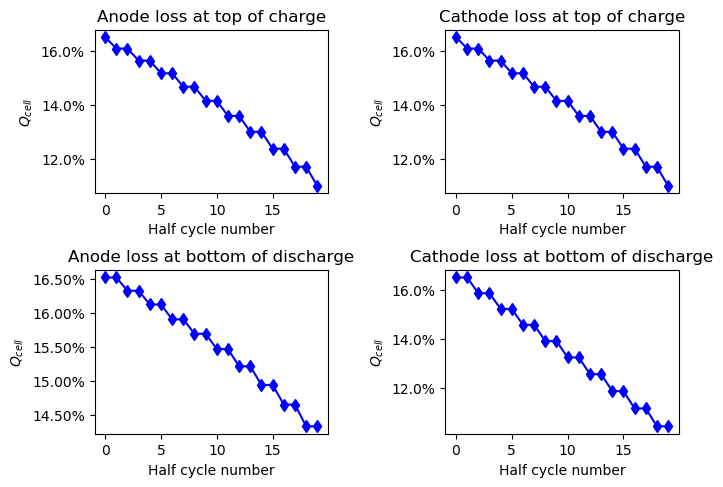

In [56]:

dummy = cs.static_plot(aml_cells['CLTC'])
for axx in dummy.ax:
    for ax in axx:
        ax.clear()
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
        ax.set_xlabel('Half cycle number')
        ax.set_ylabel('$Q_{cell}$')
        
dummy.ax[0][0].set_title('Anode loss at top of charge')        
dummy.ax[0][1].set_title('Cathode loss at top of charge')
dummy.ax[1][0].set_title('Anode loss at bottom of discharge')
dummy.ax[1][1].set_title('Cathode loss at bottom of discharge')

y=cycle_ends(aml_cells['ALTC'].cycles)[['Q_cycle', 'cyc_type']]
yy=y[(y['cyc_type']=='C') | (y['cyc_type']=='D')]['Q_cycle'].abs()
x=np.arange(len(yy))
dummy.ax[0][0].plot(x, yy, 'b-d')

y=cycle_ends(aml_cells['CLTC'].cycles)[['Q_cycle', 'cyc_type']]
yy=y[(y['cyc_type']=='C') | (y['cyc_type']=='D')]['Q_cycle'].abs()
x=np.arange(len(yy))
dummy.ax[0][1].plot(x, yy, 'b-d')

y=cycle_ends(aml_cells['ALBD'].cycles)[['Q_cycle', 'cyc_type']]
yy=y[(y['cyc_type']=='C') | (y['cyc_type']=='D')]['Q_cycle'].abs()
x=np.arange(len(yy))
dummy.ax[1][0].plot(x, yy, 'b-d')

y=cycle_ends(aml_cells['CLBD'].cycles)[['Q_cycle', 'cyc_type']]
yy=y[(y['cyc_type']=='C') | (y['cyc_type']=='D')]['Q_cycle'].abs()
x=np.arange(len(yy))
dummy.ax[1][1].plot(x, yy, 'b-d')


dummy.plot(fname='AML_Q_comp.png')

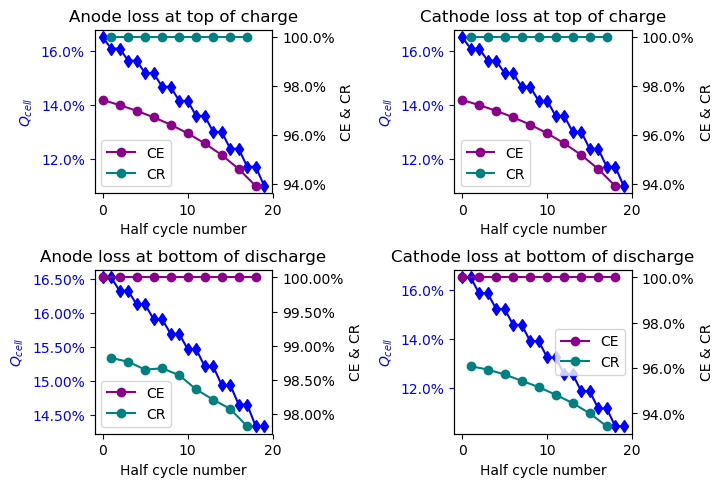

In [83]:
dummy = cs.static_plot(aml_cells['CLTC'])
nax = [[],[]]
for i in [0,1]:
    
    for ax in dummy.ax[i][:]:
        ax.clear()
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
        ax.set_xlabel('Half cycle number')
        ax.tick_params('y',colors='b' )
        ax.set_ylabel('$Q_{cell}$', color='b')
        nax[i].append(ax)
        nax[i].append(ax.twinx())
        nax[i][-1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
        nax[i][-1].set_ylabel('CE & CR')

dummy.ax=nax        
dummy.ax[0][0].set_title('Anode loss at top of charge')        
dummy.ax[0][2].set_title('Cathode loss at top of charge')
dummy.ax[1][0].set_title('Anode loss at bottom of discharge')
dummy.ax[1][2].set_title('Cathode loss at bottom of discharge')

y=cycle_ends(aml_cells['ALTC'].cycles)[['Q_cycle', 'cyc_type']]
yy=y[(y['cyc_type']=='C') | (y['cyc_type']=='D')]['Q_cycle'].abs()
yC=np.array(y[(y['cyc_type']=='C')]['Q_cycle'].values)
yD=np.array(y[(y['cyc_type']=='D')]['Q_cycle'].values)
x=np.arange(len(yy))
dummy.ax[0][0].plot(x, yy, 'b-d', label='§Q_cell§')
CE = abs(yD/yC)
xE= np.arange(0,len(yy),2)
dummy.ax[0][1].plot(xE, CE, '-o', color='darkmagenta', label='CE')
xR =np.arange(1,len(yy)-1,2)
CR = abs(yC[1:]/yD[:-1])
dummy.ax[0][1].plot(xR, CR, '-o', color='teal', label='CR')
dummy.ax[0][1].legend(loc='best')

y=cycle_ends(aml_cells['CLTC'].cycles)[['Q_cycle', 'cyc_type']]
yy=y[(y['cyc_type']=='C') | (y['cyc_type']=='D')]['Q_cycle'].abs()
yC=np.array(y[(y['cyc_type']=='C')]['Q_cycle'].values)
yD=np.array(y[(y['cyc_type']=='D')]['Q_cycle'].values)
x=np.arange(len(yy))
dummy.ax[0][2].plot(x, yy, 'b-d', label='§Q_cell§')
CE = abs(yD/yC)
xE= np.arange(0,len(yy),2)
dummy.ax[0][3].plot(xE, CE, '-o', color='darkmagenta', label='CE')
xR =np.arange(1,len(yy)-1,2)
CR = abs(yC[1:]/yD[:-1])
dummy.ax[0][3].plot(xR, CR, '-o', color='teal', label='CR')
dummy.ax[0][3].legend(loc='best')

y=cycle_ends(aml_cells['ALBD'].cycles)[['Q_cycle', 'cyc_type']]
yy=y[(y['cyc_type']=='C') | (y['cyc_type']=='D')]['Q_cycle'].abs()
yC=np.array(y[(y['cyc_type']=='C')]['Q_cycle'].values)
yD=np.array(y[(y['cyc_type']=='D')]['Q_cycle'].values)
x=np.arange(len(yy))
dummy.ax[1][0].plot(x, yy, 'b-d', label='§Q_cell§')
CE = abs(yD/yC)
xE= np.arange(0,len(yy),2)
dummy.ax[1][1].plot(xE, CE, '-o', color='darkmagenta', label='CE')
xR =np.arange(1,len(yy)-1,2)
CR = abs(yC[1:]/yD[:-1])
dummy.ax[1][1].plot(xR, CR, '-o', color='teal', label='CR')
dummy.ax[1][1].legend(loc='best')

y=cycle_ends(aml_cells['CLBD'].cycles)[['Q_cycle', 'cyc_type']]
yy=y[(y['cyc_type']=='C') | (y['cyc_type']=='D')]['Q_cycle'].abs()
yC=np.array(y[(y['cyc_type']=='C')]['Q_cycle'].values)
yD=np.array(y[(y['cyc_type']=='D')]['Q_cycle'].values)
x=np.arange(len(yy))
dummy.ax[1][2].plot(x, yy, 'b-d', label='§Q_cell§')
CE = abs(yD/yC)
xE= np.arange(0,len(yy),2)
dummy.ax[1][3].plot(xE, CE, '-o', color='darkmagenta', label='CE')
xR =np.arange(1,len(yy)-1,2)
CR = abs(yC[1:]/yD[:-1])
dummy.ax[1][3].plot(xR, CR, '-o', color='teal', label='CR')
dummy.ax[1][3].legend(loc='best')



dummy.plot(fname='AML_Q_ret_comp.png')

# Li reorganization

In [5]:
cell = cs.SymCell(cat)
cell.charge2V(0.5)
cell.rearrangeLi(Closs =0.25, absolute = True, num_steps = 36)
scv = cs.DB_ticker(cell)
fname='Li_move_01.mp4'
scv.save_anim(fname=fname, show=True)
show_anim(fname)

In [7]:
cell = cs.SymCell(cat)
for i in range(5):
    cell.charge2V(0.5)
    cell.rearrangeLi(Closs =0.05, absolute = True, num_steps = 12)
cell.charge2V(0)
scv = cs.DB_ticker(cell)
fname='Li_move_02.mp4'
scv.save_anim(fname=fname, show=True)
show_anim(fname)